Mounting Google Drive for Data set

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing most commonaly used libraries

In [0]:
import pandas as pd
import numpy as np

Loading Dataset from drive as Panda's DataFrame

In [0]:
sample_submission = pd.read_csv('drive/My Drive/Analytics_vidhya/twitter_sentiment/sample_submission.csv')
test = pd.read_csv('drive/My Drive/Analytics_vidhya/twitter_sentiment/test.csv')
train = pd.read_csv('drive/My Drive/Analytics_vidhya/twitter_sentiment/train.csv')

Now importing some more libraries for data visualization and Feature Engineering 

In [0]:
import re
import nltk
import string
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# setting Printing options
pd.set_option("display.max_colwidth",200)

# disabling some warnings.....
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

# disabling setting with copy warning
pd.options.mode.chained_assignment = None

**Data Exploration**

It's always necessary to check class imbalancies while solving a classification problem. 

0    29720
1     2242
Name: label, dtype: int64
------------------------------------------------------


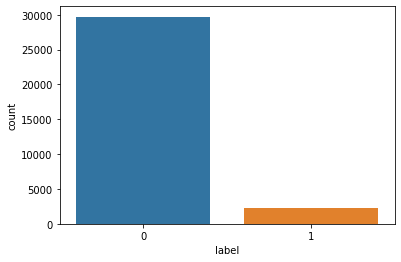

In [9]:
#Checking class imbalancies....
print(train['label'].value_counts())
print('------------------------------------------------------')
sns.countplot(train['label'])

It's a highly imbalanced datset, I will deal it with later.
Let further explore the dataset.

In [10]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [11]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦


Dataset contains lots of un-important characters and words like Special symbols, punctuations, links, etc , need to remove from tweets because they have no importance in finding sentiments.

In [0]:
#droping duplicates..

train = train.drop_duplicates().reset_index(drop = True)
test = test.drop_duplicates().reset_index(drop = True)

In [13]:
len(train)

31962

As the length is same as previous so it means dataset has no duplicates.

In [0]:
'''
 Tweet Cleaning...

 Most of the tweets are cleaned by following below steps.

 I used Spacy to parse the documents, and filtered numbers, URL, punctuation, etc.


 1- Apostrophe handled: there are two characters people use for contraction. "’"(apostrophe) and "'"(single quote). 
    If these two symbols are both used for contraction, it will be difficult to detect and properly 
    map the right expanded form. So any "’"(apostrophe) is changed to "'"(single quote).

 2- Contraction check: check if there's any contracted form, and replace it with its original form
    Parsing: done with Spacy.
 
 3- Handling emoticons.

 4- Filtering punctuation, white space, numbers, URL using Spacy methods while keeping the text content of hashtag 
    intact Removed @username.

 5- Lemmatize: lemmatized each token using Spacy method '.lemma_'. Pronouns are kept as they are since Spacy 
    lemmatizer transforms every pronoun to "-PRON-".

 6- Special character removal.

 7- Single syllable token removal.

 8- Spell correction: it is a simple spell correction dealing with repeated characters such as "sooooo goooood". 
    If the same character is repeated more than two times, it shortens the repetition to two. 
    For example "sooooo goooood" will be transformed as "soo good". This is not a perfect solution since even 
    after correction, in case of "soo", it is not a correct spelling. But at least it will help to reduce feature 
    space by making "sooo", "soooo", "sooooo" to the same word "soo". 
'''

import re
import spacy

lng = spacy.load('en')

def tweet_cleaner(tweet):
    
    #1
    tweet = re.sub("’", "'", tweet)

    #2
    tweet = ' '.join(
        [contraction_mapping[t] if t in contraction_mapping else t for t in tweet.split(" ")])
    
    #3
    tweet = tweet.split(' ')
    for x,y in emoticons.items():
      for i in range(len(tweet)):
        if tweet[i] in x:
          tweet[i] = y
    tweet = ' '.join(tweet)
    
    #4#5#6#7
    tweet = lng(tweet)
    final_tokens = []
    for token in tweet:
        if token.is_punct or token.is_space or token.like_num or token.like_url or str(token).startswith('@') or token.is_stop:
            pass
        else:
            if token.lemma_ == '-PRON-': #if token is pronoun
                final_tokens.append(str(token))
            else:
                token = re.sub("[^a-zA-Z]", '', str(token.lemma_)) # replacing special character with empty string
                if len(token) > 1:  # if token is not a empty string
                    final_tokens.append(token)
    tweet = ' '.join(final_tokens) # updating tweet after performing step 4,5,6 and 7

    #8
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

In [0]:
# Dictionary to replace cntractions with their original form.

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [0]:
# Dictionary to replace emoticons with their meaning in english.

emoticons = {
    
    (':‑)',':)',':-]',':]',':-3',':3',':->',':>','8-)','8)',':-}',':}',':o)',':c)',
     ':^)','=]','=)',':-))',':\'‑)',':\')','|;‑)','<3'):'happy',

    (':‑D',':D','8‑D','8D','x‑D','xD','X‑D','XD','=D','=3','B^D'):'laugh',

    (':‑(',':(',':‑c',':c',':‑<',':<',':‑[',':[',':-||','>:[',':{',':@','>:(',':\'‑(',
     ':\'(','|‑O',':‑J','</3','<\3'):'sad',

    ('D‑\':','D:<','D:','D8','D;','D=','DX'):'horror',

    (':‑O',':O',':‑o',':o',':-0','8‑0','>:O'):'shock',

    (':-*',':*',':×'):'kiss',

    (';‑)',';)','*-)','*)',';‑]',';]',';^)',':‑,',';D'):'wink',

    (':‑P',':P','X‑P','XP','x‑p','xp',':‑p',':p',':‑Þ',':Þ',':‑þ',':þ',':‑b',':b','d:','=p','>:P'):'playful',

    (':‑/',':/',':‑.','>:\\','>:/',':\\','=/','=\\',':L','=L',':S','%‑)','%)'):'confuse',

    (':‑|',':|',':‑X',':X',':‑#',':#',':‑&',':&'):'nothing',

    (':$','://)','://3'):'embarrassed',

    ('O:‑)','O:)','0:‑3','0:3','0:‑)','0:)','0;^)'):'angel',

    ('>:‑)','>:)','}:‑)','}:)','3:‑)','3:)','>;)','>:3','>;3'):'devil',

    (':‑###..',':###..'):'sick',

    ('\',:-|','\',:-l'):'scepticism'

}

In [0]:
# Applying tweet_cleaner function to each and every tweet.

train['cleaned_tweet'] = [tweet_cleaner(tweet) for tweet in train['tweet']]
test['cleaned_tweet'] = [tweet_cleaner(tweet) for tweet in test['tweet']]

In [18]:
train.head(1000)

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer wheelchair van pdx disapointe getthanke
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
995,996,0,are you really or just pretending to be? #truthseekers #empowerment #selfimprovement #healing #ihearadio,pretend truthseeker empowerment selfimprovement heal ihearadio
996,997,0,i finally found a way how to delete old tweets! you might find it useful as well: #deletetweets,finally find way delete old tweet find useful deletetweet
997,998,0,@user what a #view #oregon #poland #usa #unitedstates #holiday #dj #producer #houseâ¦,view oregon poland usa unitedstate holiday dj producer house
998,999,0,"have you put in your #vote yet? if you havent, do it and #share so we can see what makes #you #smile. #poll",vote not share make smile poll


In [19]:
test.head(10)

,id,tweet,cleaned_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,studiolife aislife require passion dedication willpower find newmaterials
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,white supremacist want new birds movie heres
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe way heal acne altwaystoheal healthy healing
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",hp cursed child book reservation yes harrypotter pottermore favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",rd bihday amazing hilarious nephew eli ahmir uncle dave love misses
5,31968,choose to be :) #momtips,choose happy momtip
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦,inside die eye ness smokeyeye tired lonely sof grunge
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!,finishedtattooinkedinkloveit thanksalee
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels,understand dad leave young confuse deep inthefeel
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦,delicious food lovelife capetown mannaepicure resturant


In [0]:
# dropping uncleaned tweet column from both train and test dataset to save memory.

train.drop('tweet', axis = 1, inplace = True)
test.drop('tweet', axis = 1, inplace = True)

In [21]:
train.head(10)

,id,label,cleaned_tweet
0,1,0,father dysfunctional selfish drag kid dysfunction run
1,2,0,thank lyft credit use cause offer wheelchair van pdx disapointe getthanke
2,3,0,bihday majesty
3,4,0,model love time ur
4,5,0,factsguide society motivation
5,6,0,huge fan fare big talk leave chaos pay dispute allshowandnogo
6,7,0,camping tomorrow danny
7,8,0,school year year exams think school exam hate imagine actorslife revolutionschool girl
8,9,0,win love land allin cavs champion cleveland clevelandcavalier
9,10,0,welcome gr


In [22]:
test.head(10)

,id,cleaned_tweet
0,31963,studiolife aislife require passion dedication willpower find newmaterials
1,31964,white supremacist want new birds movie heres
2,31965,safe way heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservation yes harrypotter pottermore favorite
4,31967,rd bihday amazing hilarious nephew eli ahmir uncle dave love misses
5,31968,choose happy momtip
6,31969,inside die eye ness smokeyeye tired lonely sof grunge
7,31970,finishedtattooinkedinkloveit thanksalee
8,31971,understand dad leave young confuse deep inthefeel
9,31972,delicious food lovelife capetown mannaepicure resturant


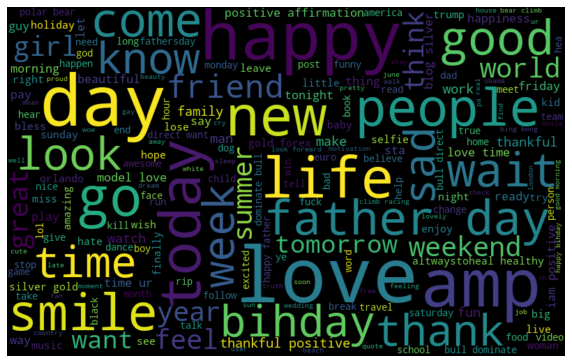

In [23]:
# Plotting word cloud to see most frequent words in whole data set

from wordcloud import WordCloud

all_words = ' '.join([text for text in train['cleaned_tweet']])
wc = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most frequent words are Love, Day, Time, etc.
bihday is the abbreviation of birthday, lets replace bihday with birthday.


In [0]:
train['cleaned_tweet'][train['cleaned_tweet'].str.contains('bihday')] = train['cleaned_tweet'][train['cleaned_tweet']
                                                                                               .str.contains('bihday')].str.replace('bihday','birthday')
test['cleaned_tweet'][test['cleaned_tweet'].str.contains('bihday')] = test['cleaned_tweet'][test['cleaned_tweet']
                                                                                               .str.contains('bihday')].str.replace('bihday','birthday')                                                                                               

Now lets checks wordcloud for negative and positive tweets saparately..

In [0]:
all_words_positive = ' '.join([text for text in train['cleaned_tweet'][train['label']==0]])
all_words_negative = ' '.join([text for text in train['cleaned_tweet'][train['label']==1]])

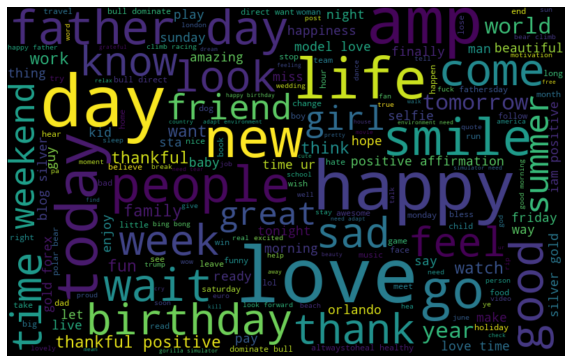

In [26]:
## positive tweets
wc = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words_positive)
plt.figure(figsize=(10, 7)) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Positive tweets mostly contains positive words like ... Love, Happy, smile, etc.

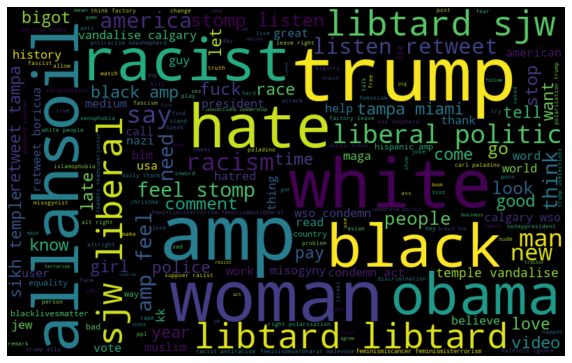

In [27]:
## negative tweets
wc = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words_negative)
plt.figure(figsize=(10, 7)) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In negative tweets most frequent words are Trump, woman, Obama... means people are tweeting bad things about woman, Trump and Obama.

**MODELING**

Class Imbalacing :- 

There are two method for handling imbalacing 

    1 - Over sampling
    2 - Down sampling 

My Strategy :- 

I am going to train my model using all sampling one by one including original imbalanced data set also and then i will compare F1 score for each and I will keep that sampling which have highest score.

I am going to use Logistic Regression with Word2vec to find best sampling technique.

In [28]:
# Tokenizing tweets into words to create word-vectors

tokenized_tweets = pd.concat((train,test),axis = 0,sort = False)['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweets = tokenized_tweets.reset_index(drop = True)
tokenized_tweets

0                                                      [father, dysfunctional, selfish, drag, kid, dysfunction, run]
1                              [thank, lyft, credit, use, cause, offer, wheelchair, van, pdx, disapointe, getthanke]
2                                                                                                [birthday, majesty]
3                                                                                            [model, love, time, ur]
4                                                                                  [factsguide, society, motivation]
                                                            ...                                                     
49154         [think, factory, leave, right, polarisation, trump, uselections, leadership, politic, brexit, blm, gt]
49155                             [feel, like, mermaid, hairflip, neverready, formal, wedding, gown, dress, mermaid]
49156    [hillary, campaign, today, ohioomg, amp, word, like, as

In [0]:
# Creating word2vec model..

import gensim
import multiprocessing

model_w2vec = gensim.models.Word2Vec(tokenized_tweets,
                                     size=400, 
                                     window=5,
                                     min_count=2,
                                     sg = 1,
                                     workers=multiprocessing.cpu_count(),
                                     seed=1,
                                     sample=1e-3
                                     )

In [30]:
model_w2vec.train(tokenized_tweets, total_examples = len(tokenized_tweets), epochs = 40)

(11997840, 13882720)

In [31]:
model_w2vec.most_similar(positive = 'trump')

[('donald', 0.5388356447219849),
 ('neverump', 0.49652019143104553),
 ('dumptrump', 0.4803208112716675),
 ('embolden', 0.4738984704017639),
 ('impeachment', 0.470320463180542),
 ('yuge', 0.46906593441963196),
 ('jibe', 0.46878963708877563),
 ('fuhere', 0.4670935571193695),
 ('chopra', 0.4617515802383423),
 ('attorneygeneral', 0.45795735716819763)]

In [32]:
print(model_w2vec.wv.similarity('happy','king'))

0.088830136


In [0]:
#preparing word vectors for tweets...

'''
Strategy-----

To create word vectors for tweets,Find the average of all word vectors in a tweet.
'''

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2vec[word].reshape((1, size))
            count += 1
        except KeyError: # handling the case where the token is not in vocabulary                                    
            continue
    if(count != 0):
        vec /= count
    return vec

In [34]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweets), 400)) 
for i in range(len(tokenized_tweets)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweets[i], 400)
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape   

(49159, 400)

In [35]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.033626,0.286877,0.195448,0.259049,0.129936,0.228667,0.205473,-0.050455,0.101713,0.066249,-0.273573,-0.034788,-0.037160,-0.091858,-0.131550,0.103268,-0.033843,0.180052,0.114662,0.198449,0.054157,-0.073995,-0.003051,0.032948,-0.267155,-0.032704,-0.053924,0.125094,0.081983,0.096719,-0.027624,0.052762,0.084943,-0.148736,0.096174,-0.216249,-0.022485,0.013547,-0.214480,0.089984,...,-0.101928,-0.024121,0.022790,0.124389,-0.119050,0.191374,-0.025573,-0.140878,0.087377,0.234874,-0.021810,-0.090971,0.017258,0.015000,-0.058463,0.094760,0.221551,0.103548,0.144690,-0.220959,-0.093880,0.375287,-0.065767,-0.080798,0.198211,0.011415,0.143949,0.122294,-0.148519,-0.184443,0.249455,0.320063,0.091834,0.041462,0.180391,-0.266879,-0.070875,-0.263239,0.137042,0.115976
1,0.182316,0.125163,0.109010,-0.013330,0.221191,0.149189,0.095529,0.116598,0.060874,0.037395,-0.337609,-0.113438,-0.006593,-0.121974,-0.204260,-0.055417,-0.157332,0.146649,-0.068778,0.064405,-0.188998,-0.026700,0.087359,0.007675,0.121749,-0.252556,0.083447,-0.156544,0.167891,-0.084919,0.022402,0.229752,0.078877,0.066224,0.112496,-0.021396,-0.102469,0.246139,-0.000353,0.260764,...,0.105002,0.006014,-0.184670,0.008460,-0.052452,-0.086357,-0.192955,-0.036227,-0.106675,-0.047495,-0.136399,0.050308,-0.142028,-0.013580,0.102461,0.067760,0.186922,-0.018361,0.087800,-0.193871,-0.068829,0.119058,-0.118955,-0.210547,0.243314,-0.231132,0.065395,0.052116,0.042528,-0.185684,-0.003226,0.185804,0.007548,0.041933,-0.144904,-0.111647,0.068311,-0.139633,0.102283,0.117998
2,-0.236709,0.076468,-0.096556,0.403525,0.131369,-0.178200,-0.108197,0.084054,-0.096573,-0.004226,-0.336015,-0.324123,0.113345,-0.268833,-0.268850,-0.015830,-0.156037,0.190778,0.167403,0.303548,-0.351858,-0.241160,-0.108719,0.246891,0.099084,-0.157116,-0.054250,-0.085335,-0.212335,0.096109,-0.080013,-0.187527,-0.189981,-0.514165,-0.015534,-0.113908,0.115214,-0.225981,-0.292913,-0.097789,...,-0.132332,0.098582,-0.231959,0.304358,0.251536,-0.097889,-0.225093,-0.332906,-0.143363,0.050115,-0.666048,-0.366562,0.035519,-0.526185,0.221790,-0.078125,-0.019423,0.161130,0.316429,-0.347981,-0.460843,0.306819,0.142270,-0.044032,0.240996,0.067336,0.146506,0.010780,-0.019449,0.161164,0.137468,0.270254,-0.181032,0.342758,0.125756,0.034556,0.088954,0.338453,-0.048039,0.183471
3,0.066092,0.153617,0.400643,0.151790,-0.091732,-0.094043,0.084980,-0.158622,-0.177448,0.160406,-0.251778,0.035898,0.038462,-0.101690,-0.064601,0.029679,-0.034050,0.492312,0.297294,0.068478,0.026216,-0.082657,0.108497,-0.065522,-0.017139,-0.169883,-0.114850,-0.031077,0.101538,-0.435572,-0.144028,0.064889,0.035264,-0.261928,-0.188793,-0.281208,0.141344,0.027791,-0.155405,-0.136887,...,-0.040998,-0.009540,0.095135,0.102620,-0.023313,-0.100118,-0.027703,0.111620,-0.016066,0.222830,0.044855,-0.158751,0.189916,0.028022,0.045744,0.282821,0.243459,-0.111606,-0.022514,-0.317264,-0.206373,0.372779,0.270483,0.044907,0.185801,0.071654,0.288476,0.024791,0.315576,-0.059543,0.284122,0.092142,0.328683,-0.062586,-0.006591,-0.209251,0.332410,-0.007260,0.117805,-0.088480
4,0.327689,0.342329,0.386657,0.289649,0.359944,0.337840,-0.240001,-0.155101,0.273992,0.220678,0.331074,-0.187402,-0.250802,-0.222886,0.074139,0.027954,0.080924,0.101356,0.260769,-0.040034,-0.128725,0.033580,-0.028093,0.273837,-0.248028,-0.497117,0.165551,0.064305,-0.212239,-0.208207,-0.097360,0.366919,0.147545,0.302025,0.358626,0.005624,0.179394,-0.073300,-0.066051,0.014524,...,0.082673,-0.098540,-0.026086,0.284715,-0.188034,-0.170989,-0.335662,-0.628583,0.197240,0.286188,0.222039,-0.194606,-0.118870,-0.051391,0.166049,0.713897,0.121741,0.108611,0.445204,-0.270080,-0.040376,0.321050,0.059234,-0.013194,0.301707,0.019005,0.277099,-0.492840,0.083238,-0.173507,-

In [0]:
X = wordvec_df.iloc[:len(train),:]
X_test = wordvec_df.iloc[len(train):,:]
y = train.label

**Original Imbalanced Dataset**

In [37]:
#importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(random_state = 42, solver = 'lbfgs',max_iter=1000)

def cross_validation(k_fold, X, Y, model):
  recall = []
  precision = []
  f1 = []
  accuracy =[]

  kfold = StratifiedKFold(n_splits=k_fold, shuffle = False)
  for train,valid in kfold.split(X,Y):
    model_fit = model.fit(X.iloc[train],Y.iloc[train])
    prediction = model_fit.predict(X.iloc[valid])
    score = model_fit.score(X.iloc[valid],Y.iloc[valid])

    accuracy.append(score*100)
    precision.append(precision_score(Y.iloc[valid], prediction, average='binary')*100)
    print('              non recist  recist')
    print('precision:',precision_score(Y.iloc[valid], prediction, average=None))
    recall.append(recall_score(Y.iloc[valid], prediction, average='binary')*100)
    print('recall:   ',recall_score(Y.iloc[valid], prediction, average=None))
    f1.append(f1_score(Y.iloc[valid], prediction, average='binary')*100)
    print('f1 score: ',f1_score(Y.iloc[valid], prediction, average=None))
    print('-'*50)

  print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
  print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
  print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
  print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))    

cross_validation(5, X, y, model)


              non recist  recist
precision: [0.96346059 0.77931034]
recall:    [0.98923284 0.50334076]
f1 score:  [0.97617664 0.61163735]
--------------------------------------------------
              non recist  recist
precision: [0.96728354 0.73607038]
recall:    [0.98485868 0.55902004]
f1 score:  [0.975992   0.63544304]
--------------------------------------------------
              non recist  recist
precision: [0.96612956 0.78064516]
recall:    [0.98855989 0.54017857]
f1 score:  [0.97721603 0.63852243]
--------------------------------------------------
              non recist  recist
precision: [0.96585285 0.73030303]
recall:    [0.98502692 0.53794643]
f1 score:  [0.97534566 0.61953728]
--------------------------------------------------
              non recist  recist
precision: [0.96269515 0.71986971]
recall:    [0.98553163 0.49330357]
f1 score:  [0.97397955 0.58543046]
--------------------------------------------------
accuracy: 95.44% (+/- 0.20%)
precision: 74.92% (+/- 2.5

**Oversampling**

There are many techniques of Oversampling like RandomOverSample,SMOTE, ADASYN, etc but here I am going to use SMOTE for our use because as I had searched for best technique of oversampling so I found that SMOTE is best for NLP task.

In [0]:
from imblearn.over_sampling import SMOTE

In [39]:
def cross_validation_smote(k_fold, X, Y, model):
  recall = []
  precision = []
  f1 = []
  accuracy =[]

  kfold = StratifiedKFold(n_splits=k_fold, shuffle = False)
  for train,valid in kfold.split(X,Y):
    X_SMOTE, Y_SMOTE = SMOTE(random_state=0).fit_sample(X.iloc[train],Y.iloc[train])
    model_fit = model.fit(X_SMOTE, Y_SMOTE)
    prediction = model_fit.predict(X.iloc[valid])
    score = model_fit.score(X.iloc[valid],Y.iloc[valid])

    accuracy.append(score*100)
    precision.append(precision_score(Y.iloc[valid], prediction, average='binary')*100)
    print('              non recist  recist')
    print('precision:',precision_score(Y.iloc[valid], prediction, average=None))
    recall.append(recall_score(Y.iloc[valid], prediction, average='binary')*100)
    print('recall:   ',recall_score(Y.iloc[valid], prediction, average=None))
    f1.append(f1_score(Y.iloc[valid], prediction, average='binary')*100)
    print('f1 score: ',f1_score(Y.iloc[valid], prediction, average=None))
    print('-'*50)

  print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
  print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
  print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
  print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))    

cross_validation_smote(5, X, y, model)

              non recist  recist
precision: [0.98646672 0.40540541]
recall:    [0.90746972 0.83518931]
f1 score:  [0.94532072 0.54585153]
--------------------------------------------------
              non recist  recist
precision: [0.98502496 0.37398374]
recall:    [0.89636608 0.81959911]
f1 score:  [0.93860654 0.51360782]
--------------------------------------------------
              non recist  recist
precision: [0.98617176 0.41517857]
recall:    [0.91184388 0.83035714]
f1 score:  [0.94755245 0.55357143]
--------------------------------------------------
              non recist  recist
precision: [0.9853211  0.39065817]
recall:    [0.90343203 0.82142857]
f1 score:  [0.94260137 0.5294964 ]
--------------------------------------------------
              non recist  recist
precision: [0.98560233 0.40773481]
recall:    [0.90982503 0.82366071]
f1 score:  [0.94619893 0.54545455]
--------------------------------------------------
accuracy: 90.02% (+/- 0.54%)
precision: 39.86% (+/- 1.4

**Undersampling**

I am going to use Nearmiss for undersampling.

In [0]:
from imblearn.under_sampling import NearMiss 

In [41]:
def cross_validation_nearmiss(k_fold, X, Y, model):
  recall = []
  precision = []
  f1 = []
  accuracy =[]

  kfold = StratifiedKFold(n_splits=k_fold, shuffle = False, random_state = 42)
  for train,valid in kfold.split(X,Y):
    X_Near, Y_Near = NearMiss(version=3).fit_sample(X.iloc[train],Y.iloc[train])
    model_fit = model.fit(X_Near, Y_Near)
    prediction = model_fit.predict(X.iloc[valid])
    score = model_fit.score(X.iloc[valid],Y.iloc[valid])

    accuracy.append(score*100)
    precision.append(precision_score(Y.iloc[valid], prediction, average='binary')*100)
    print('              non recist  recist')
    print('precision:',precision_score(Y.iloc[valid], prediction, average=None))
    recall.append(recall_score(Y.iloc[valid], prediction, average='binary')*100)
    print('recall:   ',recall_score(Y.iloc[valid], prediction, average=None))
    f1.append(f1_score(Y.iloc[valid], prediction, average='binary')*100)
    print('f1 score: ',f1_score(Y.iloc[valid], prediction, average=None))
    print('-'*50)

  print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
  print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
  print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
  print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))    

cross_validation_nearmiss(5, X, y, model)

              non recist  recist
precision: [0.97699083 0.38674699]
recall:    [0.91436743 0.71492205]
f1 score:  [0.94464239 0.50195465]
--------------------------------------------------
              non recist  recist
precision: [0.97930782 0.36051502]
recall:    [0.89973082 0.74832962]
f1 score:  [0.93783428 0.48660391]
--------------------------------------------------
              non recist  recist
precision: [0.97825306 0.39492754]
recall:    [0.91571332 0.72991071]
f1 score:  [0.94595064 0.51253918]
--------------------------------------------------
              non recist  recist
precision: [0.9793277  0.40168878]
recall:    [0.91655451 0.74330357]
f1 score:  [0.94690189 0.52153485]
--------------------------------------------------
              non recist  recist
precision: [0.97666068 0.38686131]
recall:    [0.91520861 0.70982143]
f1 score:  [0.9449366 0.5007874]
--------------------------------------------------
accuracy: 89.95% (+/- 0.54%)
precision: 38.61% (+/- 1.40%

**Comparing Scores**

f1_score is better in Original Imbalanced DataSet.
Precision_score is also better in Original Imbalanced DataSet.
Recall_score is better in Oversampled Dataset.
Accuracy_score is better in Original DataSet.


**Choosing Best Model**

Here I am choosing Original Imbalanced DataSet as best model because for my use case, I need to F1 score to be higher.

In [42]:
pip install catboost

     |████████████████████████████████| 63.9MB 45kB/s 


In [0]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(
                            loss_function='Logloss',
                            random_state = 0,
                            custom_metric=['F1'],
                            score_function='Cosine',
                            verbose = 100
                             )



In [44]:
def cross_validation_cat(k_fold, X, Y, model):
  recall = []
  precision = []
  f1 = []
  accuracy =[]

  kfold = StratifiedKFold(n_splits=k_fold, shuffle = False)
  for train,valid in kfold.split(X,Y):
    model_fit = model.fit(X.iloc[train],Y.iloc[train])
    prediction = model_fit.predict(X.iloc[valid])
    score = model_fit.score(X.iloc[valid],Y.iloc[valid])

    accuracy.append(score*100)
    precision.append(precision_score(Y.iloc[valid], prediction, average='binary')*100)
    print('              non recist  recist')
    print('precision:',precision_score(Y.iloc[valid], prediction, average=None))
    recall.append(recall_score(Y.iloc[valid], prediction, average='binary')*100)
    print('recall:   ',recall_score(Y.iloc[valid], prediction, average=None))
    f1.append(f1_score(Y.iloc[valid], prediction, average='binary')*100)
    print('f1 score: ',f1_score(Y.iloc[valid], prediction, average=None))
    print('-'*50)

  print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
  print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
  print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
  print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))    

cross_validation_cat(5, X, y, model_cat)

Learning rate set to 0.041928
0:	learn: 0.6384371	total: 218ms	remaining: 3m 38s
100:	learn: 0.1234732	total: 14.5s	remaining: 2m 8s
200:	learn: 0.0997474	total: 28.5s	remaining: 1m 53s
300:	learn: 0.0820126	total: 42.2s	remaining: 1m 37s
400:	learn: 0.0680715	total: 56.1s	remaining: 1m 23s
500:	learn: 0.0572518	total: 1m 10s	remaining: 1m 9s
600:	learn: 0.0485644	total: 1m 24s	remaining: 55.8s
700:	learn: 0.0410134	total: 1m 38s	remaining: 41.8s
800:	learn: 0.0352405	total: 1m 51s	remaining: 27.8s
900:	learn: 0.0302335	total: 2m 5s	remaining: 13.8s
999:	learn: 0.0261675	total: 2m 19s	remaining: 0us
              non recist  recist
precision: [0.96772608 0.87197232]
recall:    [0.99377524 0.56124722]
f1 score:  [0.98057769 0.68292683]
--------------------------------------------------
Learning rate set to 0.041928
0:	learn: 0.6387823	total: 143ms	remaining: 2m 23s
100:	learn: 0.1224253	total: 14.5s	remaining: 2m 9s
200:	learn: 0.0988780	total: 28.7s	remaining: 1m 53s
300:	learn: 0.0817

In [45]:
model_cat = CatBoostClassifier(
                            loss_function='Logloss',
                            random_state = 0,
                            custom_metric=['F1'],
                            score_function='Cosine',
                            verbose = 50,
                            iterations = 2000,
                            learning_rate = 0.044662
                             )

model_cat.fit(X,y)

0:	learn: 0.6353392	total: 148ms	remaining: 4m 55s
50:	learn: 0.1477369	total: 7.71s	remaining: 4m 54s
100:	learn: 0.1226545	total: 15.3s	remaining: 4m 47s
150:	learn: 0.1099296	total: 22.8s	remaining: 4m 39s
200:	learn: 0.1003074	total: 30.3s	remaining: 4m 31s
250:	learn: 0.0920987	total: 37.6s	remaining: 4m 21s
300:	learn: 0.0839807	total: 44.8s	remaining: 4m 13s
350:	learn: 0.0770234	total: 52.2s	remaining: 4m 5s
400:	learn: 0.0707831	total: 59.5s	remaining: 3m 57s
450:	learn: 0.0652080	total: 1m 6s	remaining: 3m 49s
500:	learn: 0.0600187	total: 1m 14s	remaining: 3m 41s
550:	learn: 0.0558861	total: 1m 21s	remaining: 3m 34s
600:	learn: 0.0517791	total: 1m 28s	remaining: 3m 27s
650:	learn: 0.0480371	total: 1m 36s	remaining: 3m 19s
700:	learn: 0.0446549	total: 1m 43s	remaining: 3m 11s
750:	learn: 0.0413320	total: 1m 50s	remaining: 3m 4s
800:	learn: 0.0382774	total: 1m 58s	remaining: 2m 56s
850:	learn: 0.0355677	total: 2m 5s	remaining: 2m 49s
900:	learn: 0.0332088	total: 2m 12s	remainin

In [0]:
y_pred = model_cat.predict(X_test)

In [0]:
sample_submission['label'] = y_pred

In [0]:
sample_submission.to_csv('drive/My Drive/Analytics_vidhya/twitter_sentiment/submission23.csv',index = False)